### 1) 데이터 전체 훑어보기 
* pd.info() 를 통해 NaN 값 존재 확인함. (그래프 그리기 전 drop처리 필요)
```
LotFrontage     1201 non-null float64
Alley           91 non-null object
```

In [83]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
sns.set()

In [84]:
hp = pd.read_csv('./train.csv')
hp.shape

(1460, 81)

In [85]:
hp.loc[:,'Id':'YearRemodAdd'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
Id              1460 non-null int64
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Street          1460 non-null object
Alley           91 non-null object
LotShape        1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
dtypes: float64(1), int64(7), object(13)
memory usage: 239.6+ KB


### 2) Target 과 가장 높은 상관관계 보이는 3 칼럼 추가 그래프


**2-1) categorical feature (13개)**
```
MSZoning        1460 non-null object
Street          1460 non-null object
Alley           91 non-null object
LotShape        1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
```
**2-2) numeric feature (7개)**
```
MSSubClass      1460 non-null int64
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
OverallQual     1460 non-null int64   *****
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64   ***
YearRemodAdd    1460 non-null int64   **
```

* 2-2-1) OverallQual: Rates the overall material and finish of the house

      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor	
       


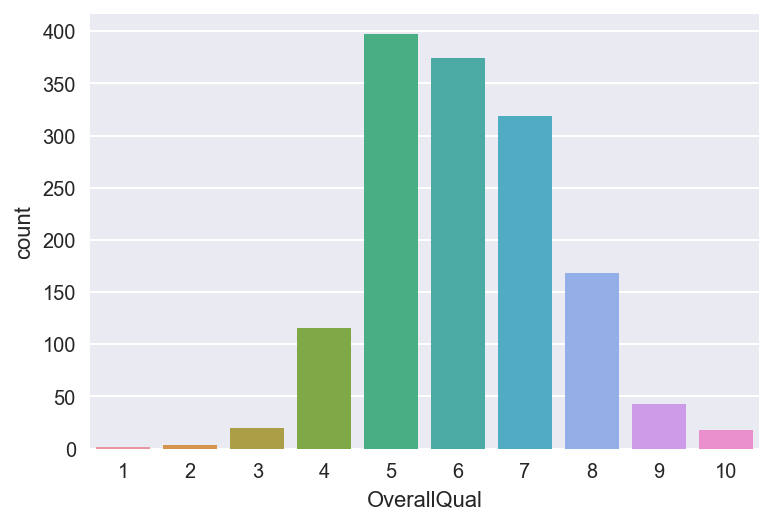

In [86]:
sns.countplot(x='OverallQual', data=hp)

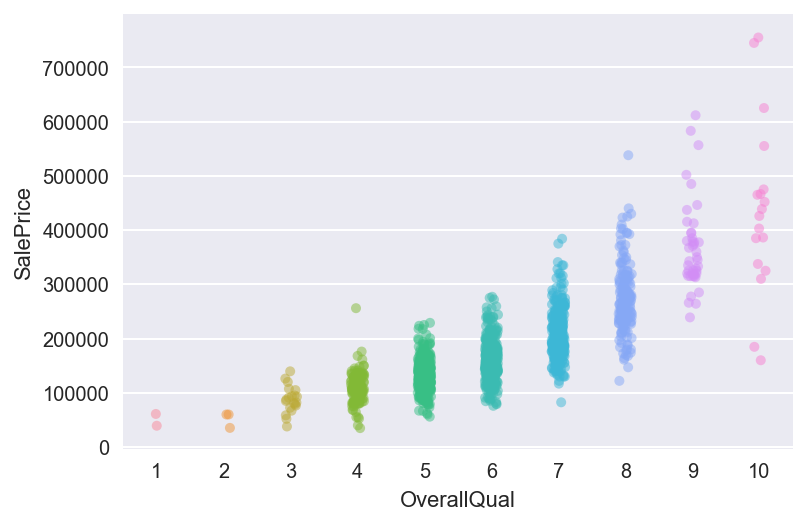

In [87]:
sns.stripplot(x='OverallQual', y='SalePrice', data=hp, jitter=True, alpha=0.5)

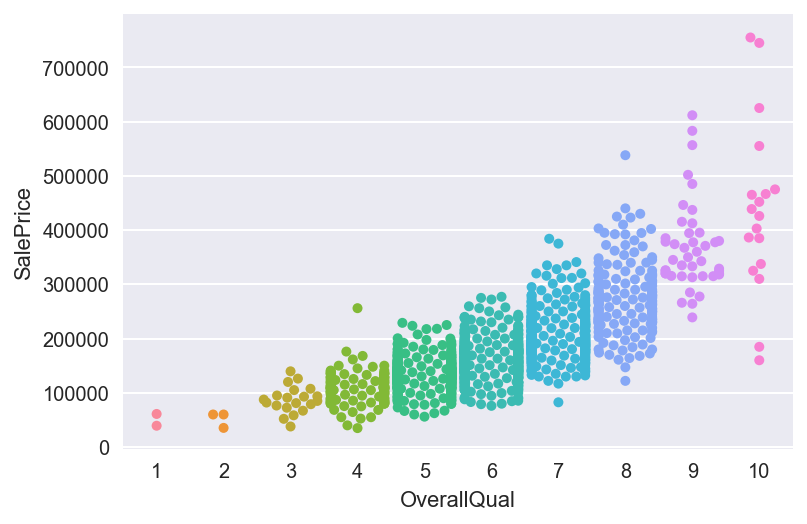

In [88]:
sns.swarmplot(x='OverallQual', y='SalePrice', data=hp, size=5)

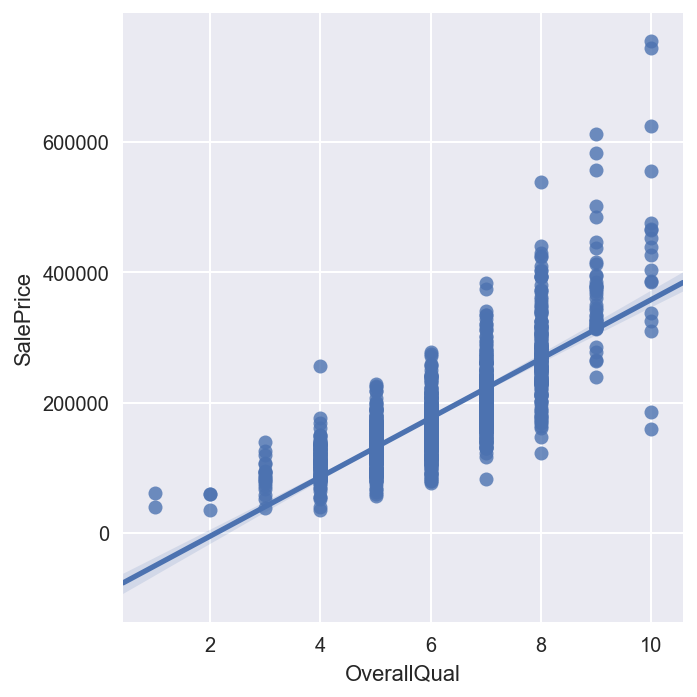

In [89]:
sns.lmplot(x='OverallQual', y='SalePrice', data=hp)

* 2-2-2) YearBuilt: Original construction date	

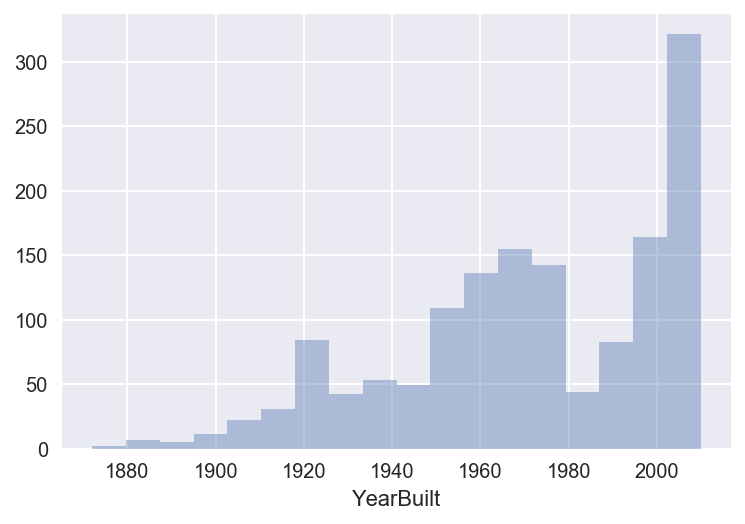

In [56]:
sns.distplot(hp.YearBuilt, kde=False)

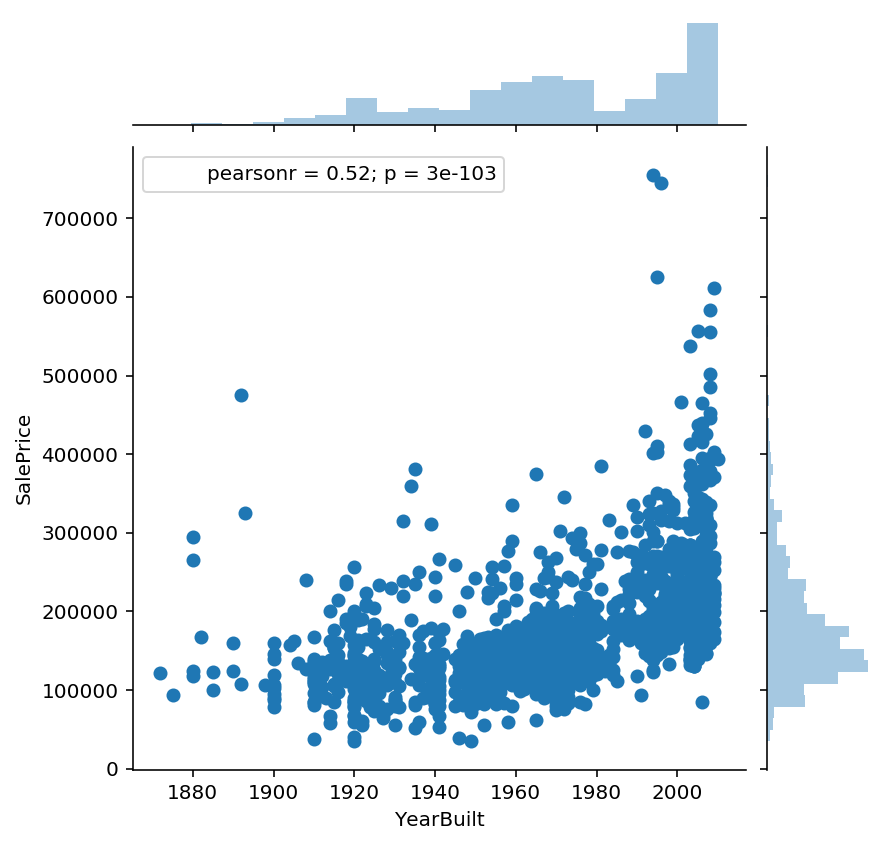

In [56]:
# YearBuilt 칼럼의 target 과의 상관관계 
sns.jointplot(x='YearBuilt', data=hp, y='SalePrice')

* 2-2-3) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

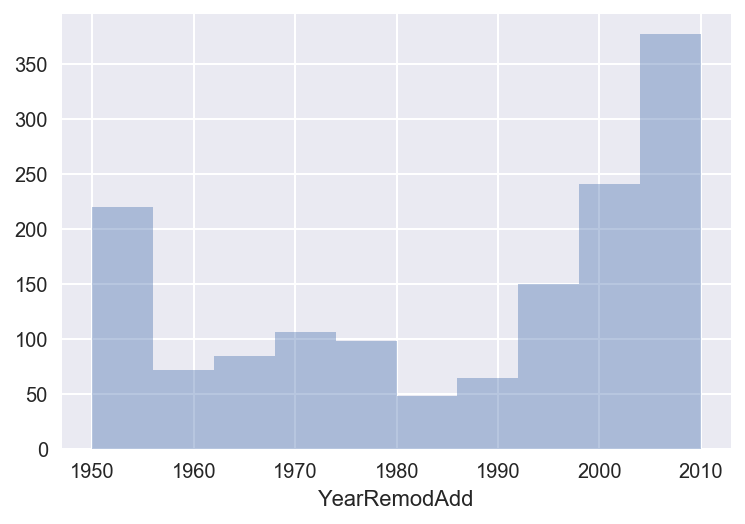

In [64]:
sns.distplot(hp.YearRemodAdd, kde=False)

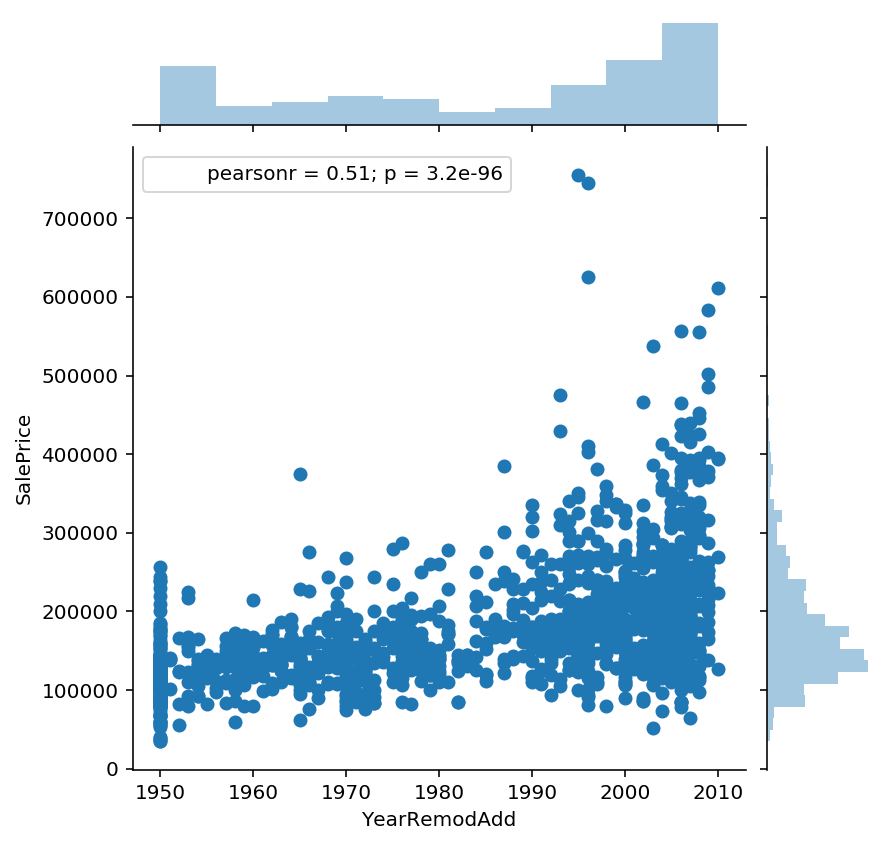

In [58]:
# YearRemodAdd 칼럼의 target과의 상관관계 
sns.jointplot(x='YearRemodAdd', y='SalePrice', data=hp)

## EDA요약 ) 
```
DataFrame의 1~20번 컬럼(MSSubClass~YearRemodAdd) 의 Target(SalePrice) 과의 상관관계를 분석한 결과 
OverallQual(0.790982), YearBuilt(0.522897), YearRemodAdd(0.507101) 세컬럼만이 양음상관관계(-1 ~ 1)를 망론하고 유일하게 0.5 이상을 
기록했다. 

* OverallQual : 전반적인 하우스 품질 (재질material, 마감finish)
* YearBuilt : 건축일
* YearRemodAdd : 리모델링일 (만일 리모델링이나 추가적인 증설addition이 없었다면 '건축일'을 입력하였음) 
```
** YearRemodAdd의 경우 1950년대 부근에서 비정상적으로 많은 데이터가 관찰되고 있다.**

In [59]:
# 전처리한 컬럼을 기존 컬럼과 concat 하여 상관관계를 살펴보기 위한 준비 단계 수행
hpfnl = pd.concat([hp['MSSubClass'], hp1, hp['LotFrontage'], hp['LotArea'], hp2, hp3, hp4, hp5, hp6, 
          hp7, hp8, hp9, hp10, hp11, hp12, hp13, hp['OverallQual'], hp['OverallCond'], hp['YearBuilt'], hp['YearRemodAdd'], hp['SalePrice']], axis=1)
hpfnl.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
1455,60,5.0,62.0,7917,1,2,0,0.0,0,0,...,8.0,2,2,1.0,3,6,5,1999,2000,175000
1456,20,5.0,85.0,13175,1,2,0,0.0,0,0,...,16.0,2,2,1.0,0,6,6,1978,1988,210000
1457,70,5.0,66.0,9042,1,2,0,0.0,0,0,...,6.0,2,2,1.0,3,7,9,1941,2006,266500
1458,20,5.0,68.0,9717,1,2,0,0.0,0,0,...,NaN,2,2,1.0,0,5,6,1950,1996,142125
1459,20,5.0,75.0,9937,1,2,0,0.0,0,0,...,7.0,2,2,1.0,0,5,6,1965,1965,147500


In [60]:
# 컬럼간의 상관관계 파악 
hpcor = hpfnl.corr()
hpcor

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
MSSubClass,1.000000,0.086898,-0.386347,-0.139781,-0.024969,-0.105995,-0.115361,-0.001982,-0.022844,-0.037573,...,-0.013040,-0.041052,-0.024080,0.763805,0.469623,0.032628,-0.059316,0.027850,0.040581,-0.084284
MSZoning,0.086898,1.000000,-0.169422,-0.069117,-0.018211,-0.109589,-0.116796,0.031634,-0.004093,-0.035777,...,-0.267473,-0.052155,0.012006,0.008824,-0.006404,-0.245114,0.180194,-0.423604,-0.242793,-0.259296
LotFrontage,-0.386347,-0.169422,1.000000,0.426095,-0.040886,0.138101,0.231878,0.082165,NaN,0.061085,...,0.094108,0.024424,0.045374,-0.383692,-0.026040,0.251646,-0.059213,0.123349,0.088866,0.351799
LotArea,-0.139781,-0.069117,0.426095,1.000000,-0.197131,0.060105,0.315484,0.173186,0.010123,0.131099,...,0.042285,0.038311,0.048534,-0.193400,-0.029586,0.105806,-0.005636,0.014228,0.013788,0.263843
Street,-0.024969,-0.018211,-0.040886,-0.197131,1.000000,-0.015720,-0.010129,-0.098238,0.001682,0.006905,...,-0.011109,-0.009938,0.001773,0.014513,0.013011,0.058823,0.042848,0.021137,0.065465,0.041036
Alley,-0.105995,-0.109589,0.138101,0.060105,-0.015720,1.000000,0.097078,-0.054601,0.006407,0.080177,...,-0.130810,0.097539,0.006754,-0.025470,-0.034394,0.099179,-0.098099,0.303155,0.073085,0.139868
LotShape,-0.115361,-0.116796,0.231878,0.315484,-0.010129,0.097078,1.000000,0.156692,0.026616,0.276675,...,0.013695,0.097331,0.009092,-0.061044,0.037859,0.198994,-0.033747,0.229365,0.175488,0.267759
LandContour,-0.001982,0.031634,0.082165,0.173186,-0.098238,-0.054601,0.156692,1.000000,-0.007325,-0.009715,...,0.001896,-0.028580,0.005770,-0.018857,-0.028953,0.049636,0.027958,-0.063443,-0.025096,0.059313
Utilities,-0.022844,-0.004093,NaN,0.010123,0.001682,0.006407,0.026616,-0.007325,1.000000,0.053620,...,0.046617,-0.000919,-0.000723,-0.008373,0.072876,-0.001881,0.009994,-0.011505,-0.034080,-0.014314
LotConfig,-0.037573,-0.035777,0.061085,0.131099,0.006905,0.080177,0.276675,-0.009715,0.053620,1.000000,...,0.043219,0.014387,-0.043419,-0.030625,0.051744,0.064471,0.012098,0.083126,0.075829,0.092316


In [61]:
# 상관관계지수가 높은 순으로 내림차순 정렬 
hpcor.iloc[20,:].sort_values(ascending=False)

SalePrice       1.000000
OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.351799
LotShape        0.267759
LotArea         0.263843
Neighborhood    0.181309
Alley           0.139868
LotConfig       0.092316
Condition1      0.083838
HouseStyle      0.063547
LandContour     0.059313
Condition2      0.057490
LandSlope       0.051152
Street          0.041036
BldgType       -0.013137
Utilities      -0.014314
OverallCond    -0.077856
MSSubClass     -0.084284
MSZoning       -0.259296
Name: SalePrice, dtype: float64

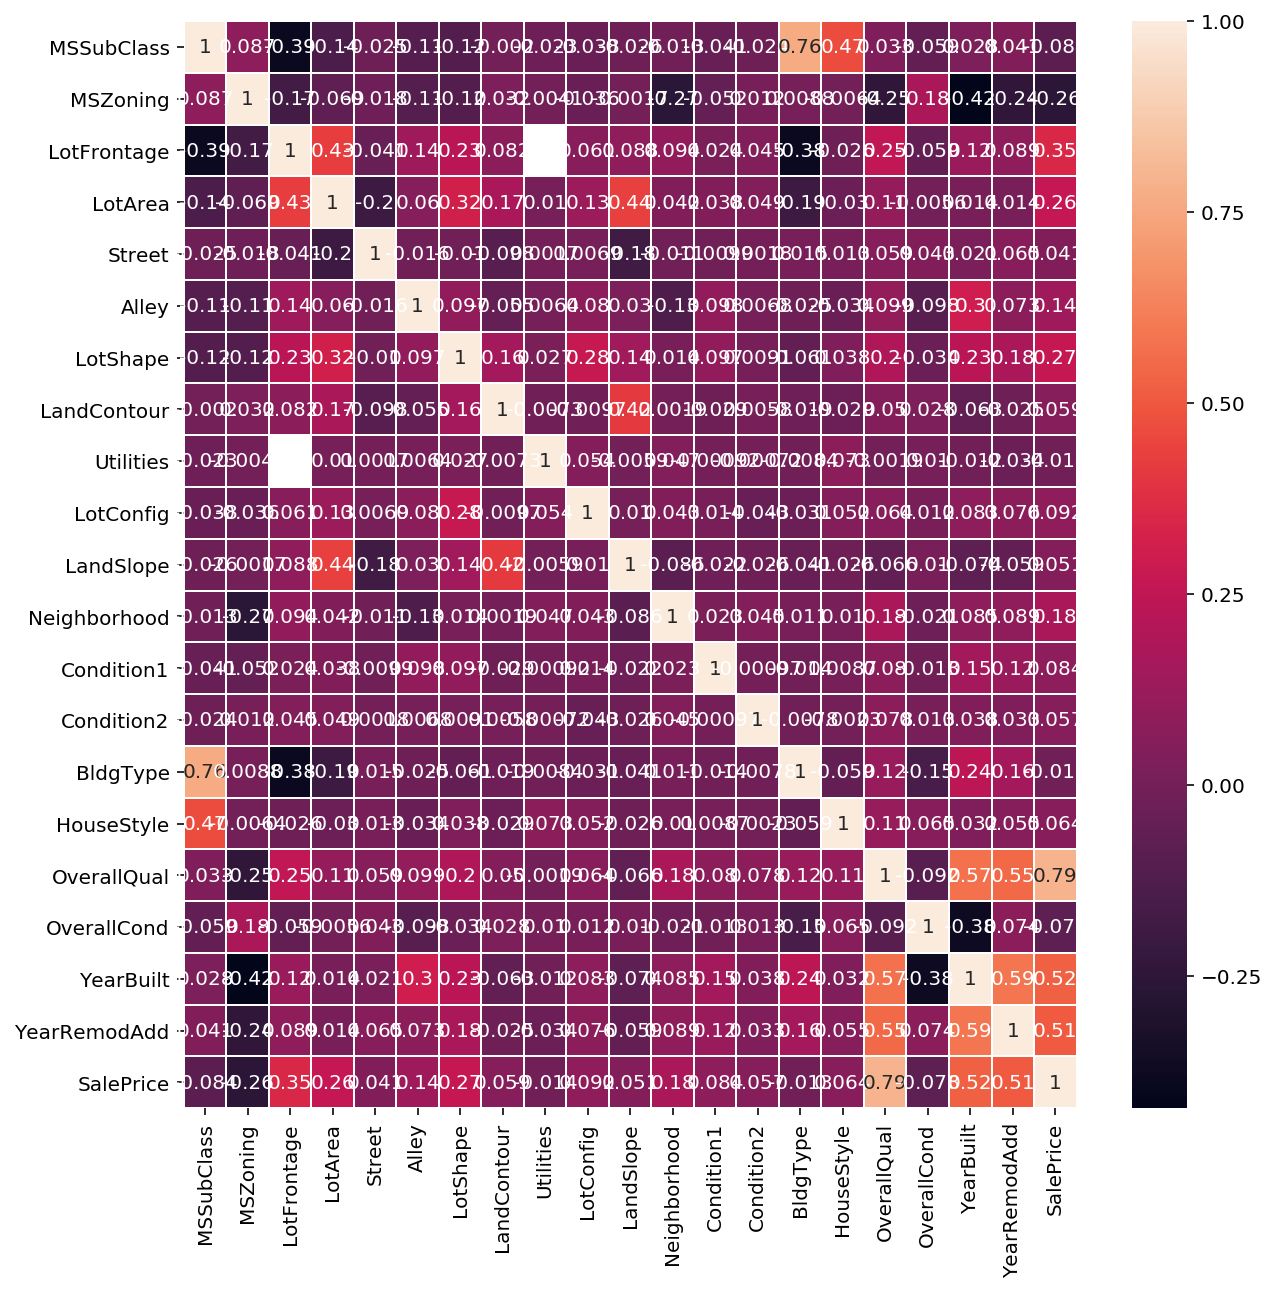

In [62]:
# heatmap 으로 상관관계 시각화 
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(hpcor, annot=True, linewidths=.5, ax=ax)